In [13]:
# %pip install opencv-python
# %pip install tensor flow
# %pip install numpy
# %pip install pandas
# %pip install keras
# %pip install adam
# %pip install kwargs
# %pip install cinit 
# %pip install sklearn2pmml joblib


     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.2 MB 435.7 kB/s eta 0:00:17
      --------------------------------------- 0.1/7.2 MB 939.4 kB/s eta 0:00:08
     - -------------------------------------- 0.3/7.2 MB 1.8 MB/s eta 0:00:04
     -- ------------------------------------- 0.5/7.2 MB 2.2 MB/s eta 0:00:04
     --- ------------------------------------ 0.6/7.2 MB 2.6 MB/s eta 0:00:03
     ---- ----------------------------------- 0.8/7.2 MB 2.9 MB/s eta 0:00:03
     ----- ---------------------------------- 1.0/7.2 MB 3.1 MB/s eta 0:00:03
     ------ --------------------------------- 1.1/7.2 MB 3.2 MB/s eta 0:00:02
     ------- -------------------------------- 1.3/7.2 MB 3.4 MB/s eta 0:00:02
     --------- ------------------------------ 1.7/7.2 MB 3.6 MB/s eta 0:00:02
     ---------- ----------------------------- 1.9/7.2 MB 3.9 MB/s eta 0:00

In [17]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [18]:
data_train = 'C:\\Users\\Abiyyu\\Documents\\ML\\dataset\\train'
data_test = 'C:\\Users\\Abiyyu\\Documents\\ML\\dataset\\test'



In [19]:
img_width, img_height = 48, 48
batch_size = 64
epochs = 10
num_classes = 7

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisasi gambar
    shear_range=0.2,  # Augmentasi: shear
    zoom_range=0.2,   # Augmentasi: zoom
    horizontal_flip=True  # Augmentasi: flip horizontal
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(48, 48),  # Ukuran gambar yang diinginkan (48x48 untuk FER)
    batch_size=64,         # Batch size
    color_mode='grayscale',  # Grayscale karena dataset emosi sering menggunakan gambar hitam putih
    class_mode='categorical'  # Klasifikasi multi-kelas
)

test_generator = test_datagen.flow_from_directory(
    data_test,
    target_size=(48, 48),
    batch_size=64,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [21]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
test_class_labels = test_generator.class_indices
print("Validation class labels:", test_class_labels)

Training class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Validation class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [22]:

model = Sequential()

# Adding convolutional layers with activations on the same line for clarity
model.add(Conv2D(32, kernel_size=(3, 3), kernel_initializer="glorot_uniform", padding='same', input_shape=(img_width, img_height, 1)))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening and adding dense layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num_classes))
model.add(Activation('softmax'))

c:\Users\Abiyyu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,            # Training data
    validation_data=test_generator,   # Validation data (could be test data)
    epochs=25,                  # Number of epochs, adjust based on your needs
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Steps per epoch
    validation_steps=test_generator.samples // test_generator.batch_size,    # Validation steps
    verbose=1                   # To display training progress
)

KeyboardInterrupt: 

In [24]:
train_loss, train_accu = model.evaluate(train_generator)
test_loss, test_accu = model.evaluate(test_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

354/354 ━━━━━━━━━━━━━━━━━━━━ 164s 463ms/step - accuracy: 0.2503 - loss: 1.8121
111/111 ━━━━━━━━━━━━━━━━━━━━ 21s 187ms/step - accuracy: 0.2434 - loss: 1.8210
final train accuracy = 25.13 , validation accuracy = 24.71


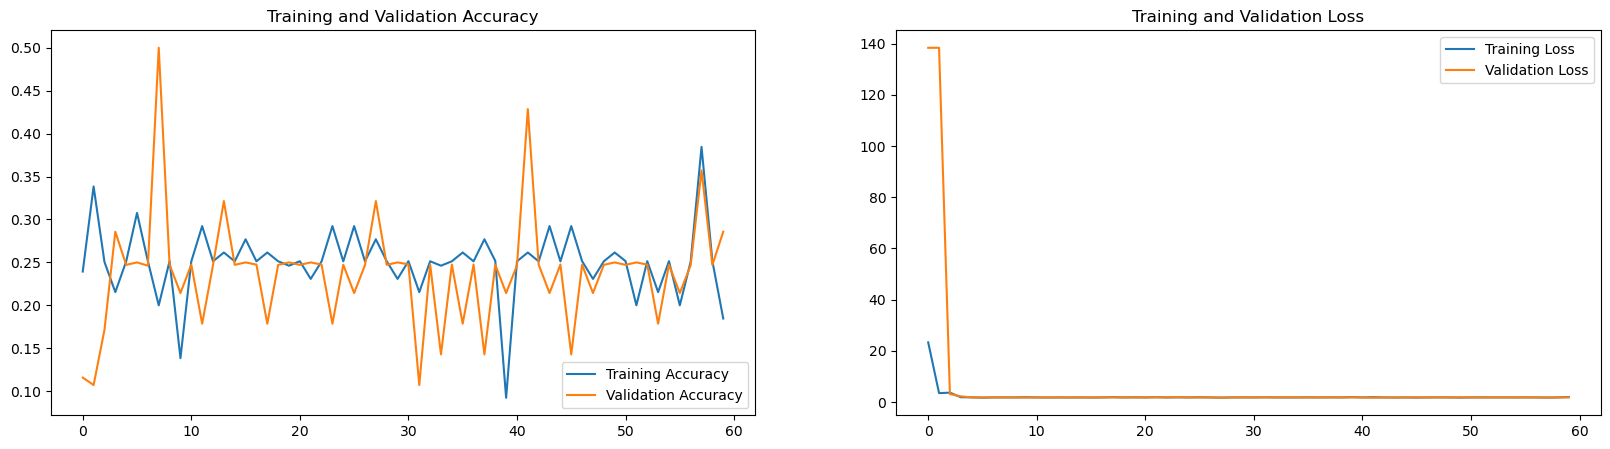

In [30]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.

    Parameters:
    - history: A Keras History object. Contains the logs from the training process.

    Returns:
    - None. Displays the matplotlib plots for training/validation accuracy and loss.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(20, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)

In [14]:
# Ensure the save directory exists
# save_dir = 'C:\\Users\\Abiyyu\\Documents\\ML\\models'
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

from sklearn2pmml import PMMLPipeline
from sklearn2pmml import sklearn2pmml
import os
import joblib  # untuk menyimpan model sementara

save_dir = 'C:\\Users\\Abiyyu\\Documents\\ML\\models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Asumsi bahwa kamu memiliki model yang disebut 'model' dari Scikit-learn
model_path = os.path.join(save_dir, 'emotion_detection_model.pkl')

# Simpan model sebagai pkl terlebih dahulu
joblib.dump(model, model_path)

# Bungkus model dalam pipeline PMML
pipeline = PMMLPipeline([("model", model)])

# Simpan sebagai PMML
sklearn2pmml(pipeline, os.path.join(save_dir, "emotion_detection_model.pmml"), with_repr=True)

# # Save the trained model
# model.save(os.path.join(save_dir, 'emotion_detection_model2.h5'))


Standard output is empty
Standard error:
Exception in thread "main" java.lang.ClassCastException: class net.razorvine.pickle.objects.ClassDictConstructor cannot be cast to class net.razorvine.pickle.objects.ClassDict (net.razorvine.pickle.objects.ClassDictConstructor and net.razorvine.pickle.objects.ClassDict are in unnamed module of loader 'app')
	at types.MethodTypeConstructor.construct(MethodTypeConstructor.java:43)
	at net.razorvine.pickle.Unpickler.load_reduce(Unpickler.java:759)
	at net.razorvine.pickle.Unpickler.dispatch(Unpickler.java:200)
	at org.jpmml.python.CustomUnpickler.dispatch(CustomUnpickler.java:32)
	at org.jpmml.python.PickleUtil$1.dispatch(PickleUtil.java:68)
	at net.razorvine.pickle.Unpickler.load(Unpickler.java:110)
	at org.jpmml.python.PickleUtil.unpickle(PickleUtil.java:89)
	at com.sklearn2pmml.Main.run(Main.java:94)
	at com.sklearn2pmml.Main.main(Main.java:84)



RuntimeError: The SkLearn2PMML application has failed. The Java executable should have printed more information about the failure into its standard output and/or standard error streams

In [25]:
# Load the trained model for real-time emotion detection
model = load_model(os.path.join(save_dir, 'emotion_detection_model.h5'))

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Supries']


In [26]:

# Load OpenCV's pre-trained Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Open the webcam (0 is the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break

    # Convert the frame to grayscale (needed for face detection)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Loop through the detected faces
    for (x, y, w, h) in faces:
        # Draw a rectangle around each face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Extract the region of interest (the face)
        face_roi = gray[y:y+h, x:x+w]

        # Resize the face to 48x48 (the input size for the model)
        face_roi = cv2.resize(face_roi, (48, 48))

        # Normalize the pixel values (as done during model training)
        face_roi = face_roi / 255.0

        # Reshape to match the model's input shape (1, 48, 48, 1)
        face_roi = np.expand_dims(face_roi, axis=0)
        face_roi = np.expand_dims(face_roi, axis=-1)

        # Predict the emotion probabilities
        emotion_prediction = model.predict(face_roi)
        max_index = np.argmax(emotion_prediction[0])

        # Get the emotion label
        emotion = emotion_labels[max_index]

        # Prepare a string to display emotion probabilities
        emotion_probabilities = []
        for i, label in enumerate(emotion_labels):
            probability = emotion_prediction[0][i] * 100  # Convert to percentage
            emotion_probabilities.append(f"{label}: {probability:.2f}%")

        # Join the probabilities into a single string
        probabilities_text = "\n".join(emotion_probabilities)

        # Display the main emotion label
        cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
        
        # Display the probabilities below the main label
        # Adjust the y-coordinate to place it below the rectangle
        y_offset = y + h + 10
        for idx, line in enumerate(emotion_probabilities):
            cv2.putText(frame, line, (x, y_offset + idx * 20), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1, cv2.LINE_AA)

    # Show the frame with the rectangles and emotion labels
    cv2.imshow('Real-time Emotion Detection', frame)

    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

In [12]:
!pip freeze > req.txt